<h1 align="center">Cirrosis: Predicción de Supervivencia del Paciente</h1>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# Feature engineering
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion, Pipeline


# Estilos plots
sns.set_palette(sns.color_palette("Set2"))
sns.set_style('darkgrid')

# Los archivos de datos de entrada están disponibles en el directorio "../data/"
from subprocess import check_output
print(check_output(["ls", "../data"]).decode("utf8"))

cirrhosis_profile.html
test.csv
train.csv



<h2>Carga de datos</h2>

In [2]:
df_train = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

# Eliminar columna id
df_train.drop(columns="id", inplace=True)
df_test.drop(columns="id", inplace=True)

print("Train shape: ", df_train.shape)
print("Test shape:  ", df_test.shape)
print(f"\n{'-' * 28}\n")

df_train.head()

Train shape:  (7905, 19)
Test shape:   (5271, 18)

----------------------------



,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


<h2>Datos</h2>

- **N_Days:** Número de días entre el registro y la fecha más temprana de muerte, trasplante o análisis del estudio en julio de 1986.
- **Drug:** Tipo de medicamento administrado al paciente, con opciones como D-penicilamina o Placebo.
- **Age:** Edad del paciente, indicando la edad cronológica en el momento de la recopilación de datos.
- **Sex:** Género del paciente.
- **Ascites:** Presencia o ausencia de ascitis, una condición médica caracterizada por la acumulación de líquido en el abdomen.
- **Hepatomegaly:** Presencia o ausencia de hepatomegalia, un agrandamiento del hígado.
- **Spiders:** Presencia o ausencia de arañas vasculares, vasos sanguíneos visibles en un patrón similar a una araña en la piel.
- **Edema:** Presencia o ausencia de edema, que es la hinchazón causada por la acumulación de exceso de líquido en los tejidos corporales.
- **Bilirubin:** Niveles de bilirrubina en la sangre, un indicador de la función hepática.
- **Cholesterol:** Niveles de colesterol en la sangre, una medida del metabolismo de los lípidos.
- **Albumin:** Niveles de albúmina en la sangre, una proteína importante producida por el hígado.
- **Copper:** Niveles de cobre, que pueden ser relevantes para la función hepática.
- **Alk_Phos:** Niveles de fosfatasa alcalina en la sangre, una enzima asociada con la función hepática y ósea.
- **SGOT:** Niveles de SGOT (Serum Glutamic Oxaloacetic Transaminase), una enzima que indica la salud del hígado.
- **Tryglicerides:** Niveles de triglicéridos en la sangre, que representan otro aspecto del metabolismo de los lípidos.
- **Platelets:** Recuento de plaquetas en la sangre, importante para la coagulación de la sangre.
- **Prothrombin:** Niveles de protrombina, un componente clave en el proceso de coagulación sanguínea.
- **Stage:** Etapa de la condición del paciente, proporcionando información sobre la gravedad o progresión de la cirrosis.


<h2>Checar por datos duplicados</h2>

In [3]:
df_train_duplicated = df_train.duplicated().sum()
df_test_duplicated = df_test.duplicated().sum()

print("Datos duplicados en train: ", df_train_duplicated)
print("Datos duplicados en test:  ", df_test_duplicated)

Datos duplicados en train:  0
Datos duplicados en test:   0


<h2>Checar por datos vacíos</h2>

In [4]:
print("Columnas con datos vacios en train:\n", df_train.isnull().sum())
print("-"*20)

print("Columnas con datos vacios en test:\n", df_test.isnull().sum())
print("-"*20)

Columnas con datos vacios en train:
 N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64
--------------------
Columnas con datos vacios en test:
 N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64
--------------------


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   float64
 17  Stage          7905 non-null   float64
 18  Status  

In [6]:
df_train.describe().round(2)

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.00,7905.00,7905.00,7905.00,7905.00,7905.0,7905.00,7905.00,7905.00,7905.00,7905.00,7905.00
mean,2030.17,18373.15,2.59,350.56,3.55,83.9,1816.75,114.60,115.34,265.23,10.63,3.03
std,1094.23,3679.96,3.81,195.38,0.35,75.9,1903.75,48.79,52.53,87.47,0.78,0.87
min,41.00,9598.00,0.30,120.00,1.96,4.0,289.00,26.35,33.00,62.00,9.00,1.00
25%,1230.00,15574.00,0.70,248.00,3.35,39.0,834.00,75.95,84.00,211.00,10.00,2.00
50%,1831.00,18713.00,1.10,298.00,3.58,63.0,1181.00,108.50,104.00,265.00,10.60,3.00
75%,2689.00,20684.00,3.00,390.00,3.77,102.0,1857.00,137.95,139.00,316.00,11.00,4.00
max,4795.00,28650.00,28.00,1775.00,4.64,588.0,13862.40,457.25,598.00,563.00,18.00,4.00


<h2>EDA - Análisis de Datos Exploratorio</h2>

In [7]:
profile = ProfileReport(df_train, title="Cirrosis: Predicción de Supervivencia del Paciente")
# profile.to_file("../data/cirrhosis_profile.html")

In [8]:
TARGET = "Status"
print(f"Target: {TARGET}\n")

unique_values = df_train.apply(pd.Series.nunique).drop(TARGET)
print(f"Número de valores posibles por cada feature:\n {unique_values}\n")

CAT_FEATURES = unique_values[unique_values < 5].index.tolist()
print(f"Features categóricas: {CAT_FEATURES}\n")

NUM_FEATURES = unique_values[unique_values >= 5].index.tolist()
print(f"Features númericas: {NUM_FEATURES}\n")

Target: Status

Número de valores posibles por cada feature:
 N_Days           461
Drug               2
Age              391
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        111
Cholesterol      226
Albumin          160
Copper           171
Alk_Phos         364
SGOT             206
Tryglicerides    154
Platelets        227
Prothrombin       49
Stage              4
dtype: int64

Features categóricas: ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

Features númericas: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']



<h4>Distribución features <b>categóricas</b></h4>

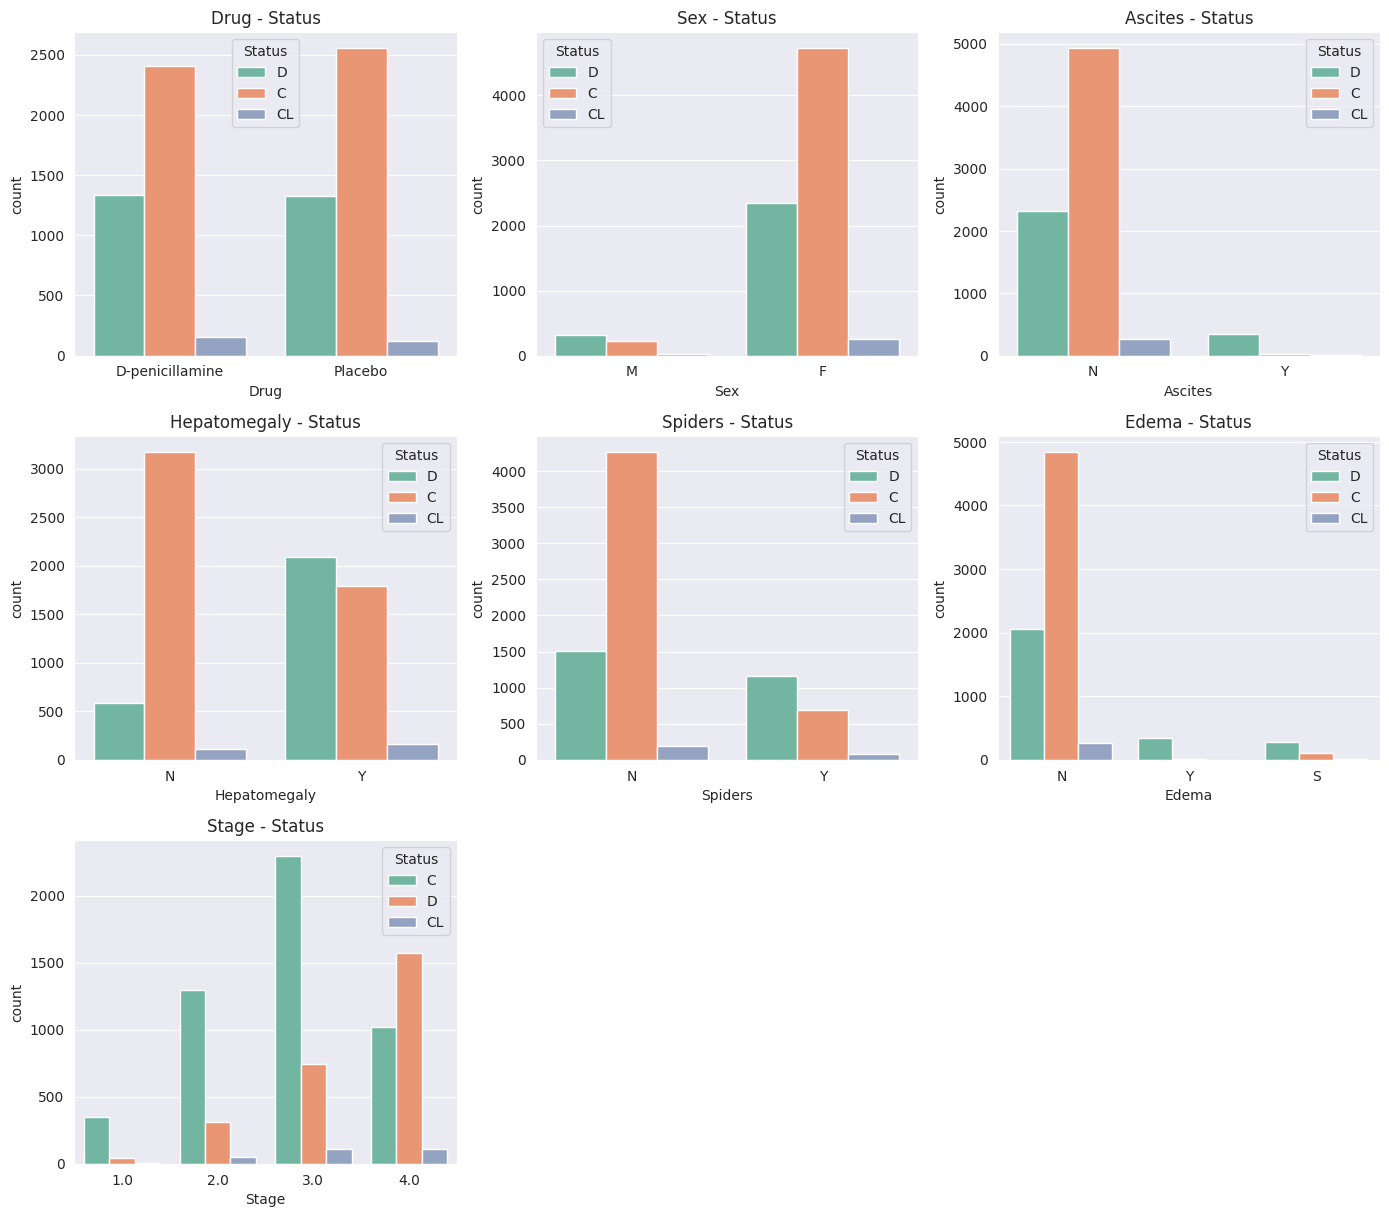

In [9]:
def categories_countplot(data, features, target):
    rows = len(features)
    cols = 3
    total = rows * cols
    
    plt.figure(figsize=(14, rows * 4))
    for i, col in enumerate(features):
        plt.subplot(rows, cols, i % total + 1)
        sns.countplot(x=col, hue=target, data=data)
        plt.title(f"{col} - {target}")
        
    plt.tight_layout()
    plt.show()

categories_countplot(df_train, CAT_FEATURES, TARGET)

<h4>Distribución features <b>númericas</b></h4>

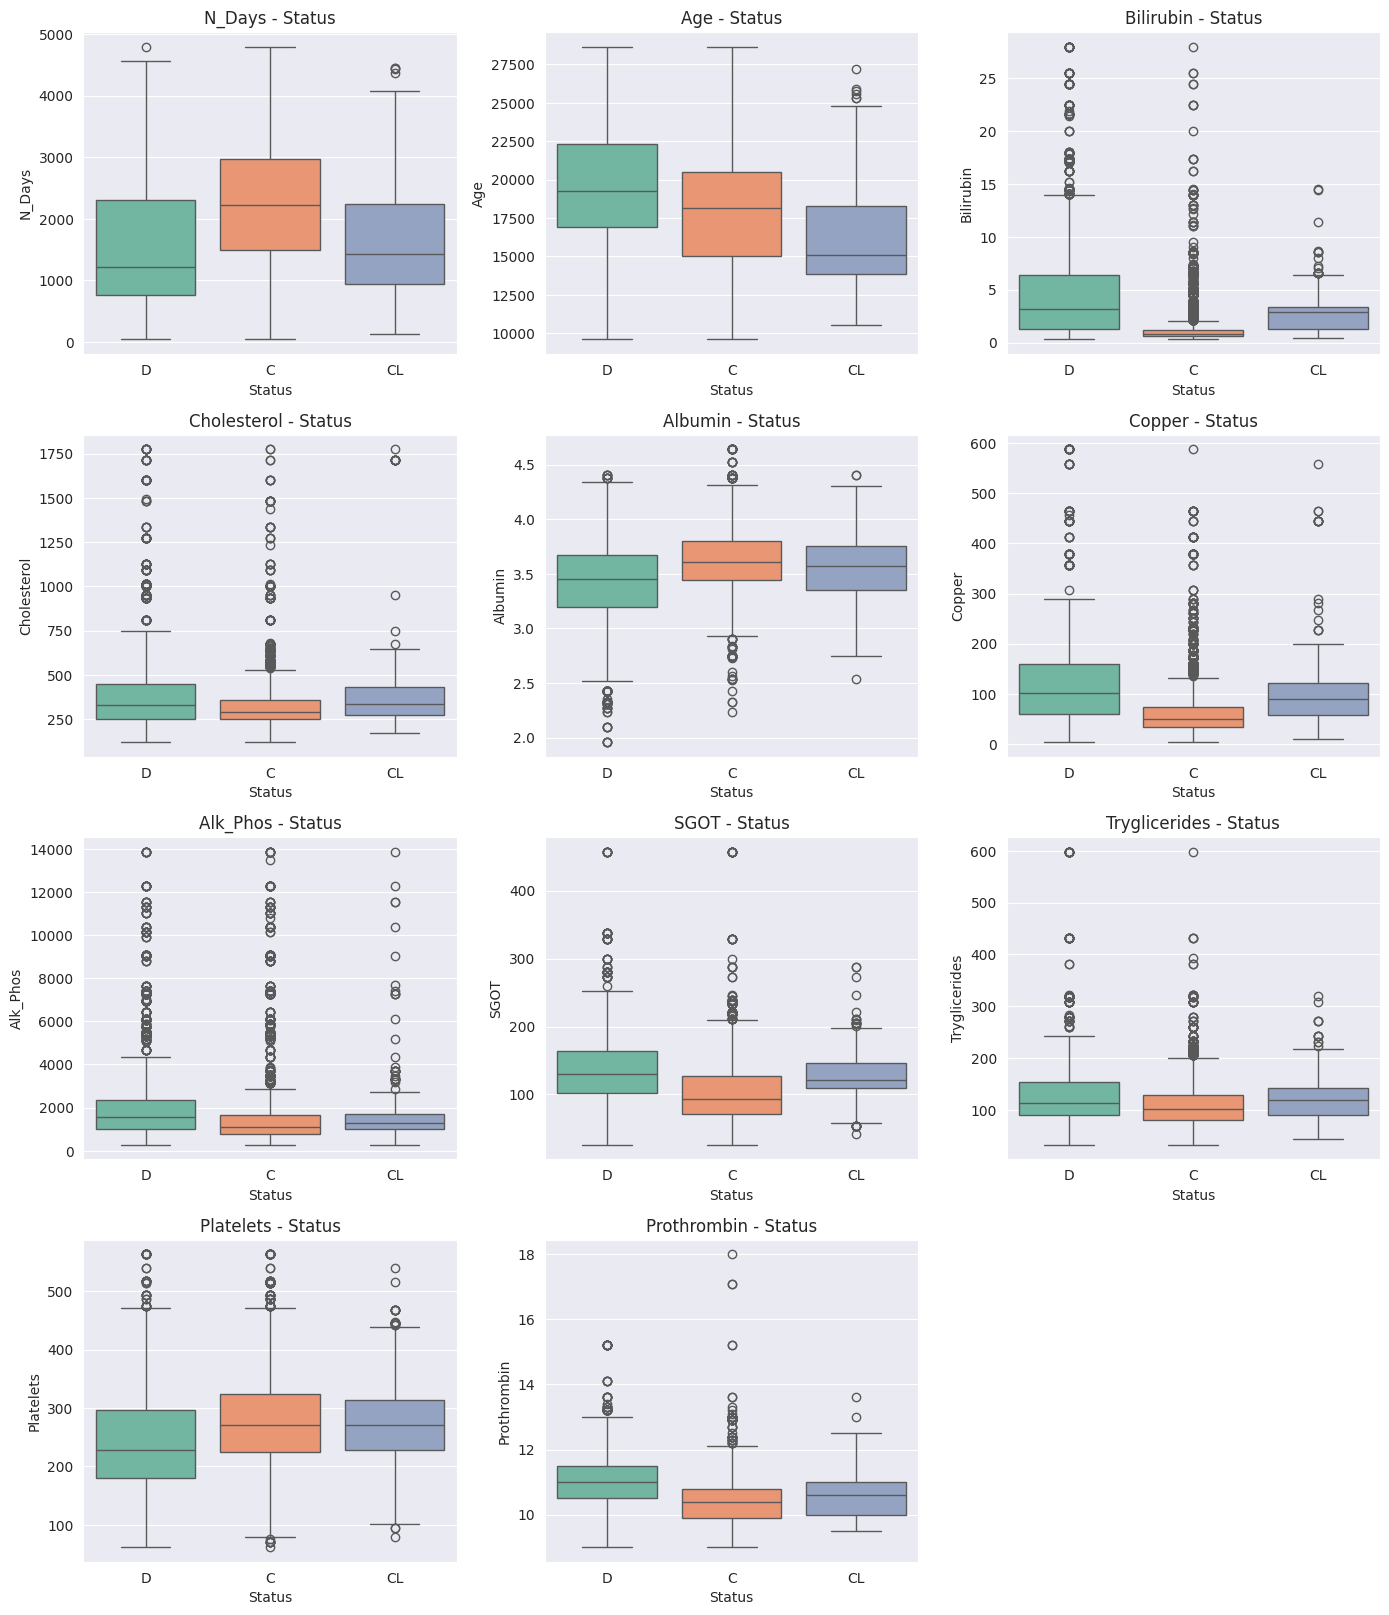

In [10]:
def numerical_boxplot(data, features, target):
    rows = len(features)
    cols = 3
    total = rows * cols
    
    plt.figure(figsize=(14, rows * 4))
    for i, col in enumerate(features):
        plt.subplot(rows, cols, i % total + 1)
        sns.boxplot(x=target, y=col, hue=target, data=data)
        plt.title(f"{col} - {target}")
        
    plt.tight_layout()
    plt.show()

numerical_boxplot(df_train, NUM_FEATURES, TARGET)

<h4>Correlación features <b>númericas</b></h4>

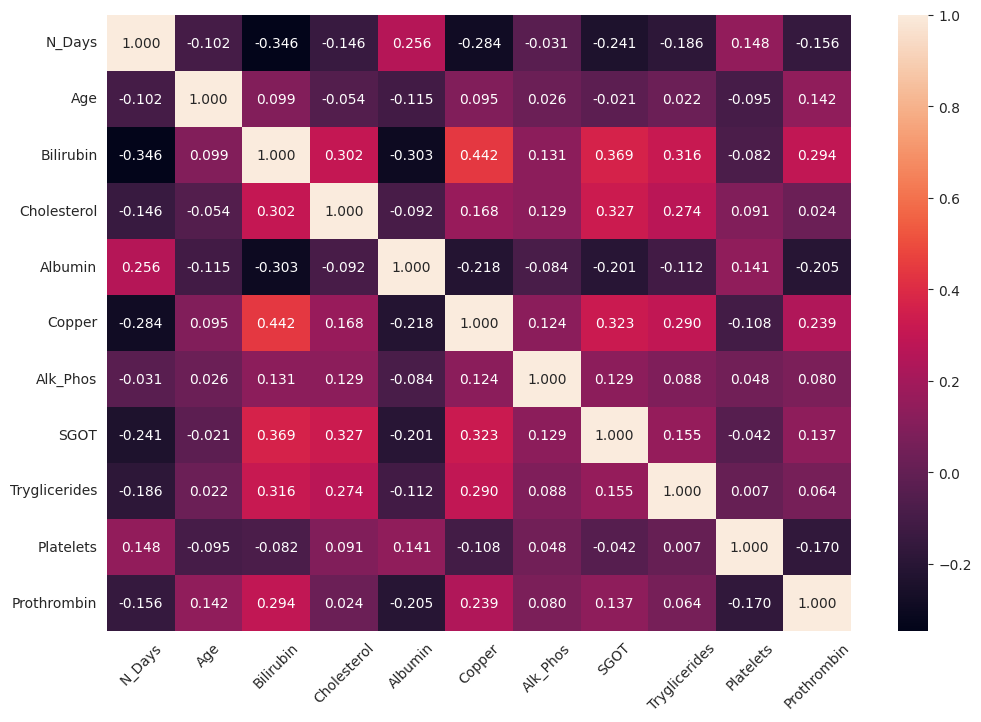

In [11]:
df_corr_num = df_train[NUM_FEATURES].corr()

plt.figure(figsize=(12,8))
sns.heatmap(df_corr_num, annot=True, fmt=".3f")
plt.xticks(rotation=45)
plt.show()

Podemos observar que **NO** existe una correlación alta entre las features numéricas. La más alta la encontramos entre Bilirrubina y Cobre, con un valor de 0.4.

<h2>Feature Engineering</h2>

Después de analizar nuestros features categóricos, podemos sacar las siguientes conclusiones:

- Las features Drug, Sex, Ascites, Hepatomegaly, Spiders y Edema al ser categóricas podemos aplicarles un OneHot-Encoding.
- Stage indica las distintas etapas de la condición del paciente, es decir, posee un orden específico. Por lo tanto, sería adecuado utilizar Ordinal-Encoding.
- Dado que State es nuestra variable objetivo, podemos aplicar un Label-Encoding.

<h4>Label-Encoding</h4>

In [12]:
label_encoder = LabelEncoder()
df_train[TARGET] = label_encoder.fit_transform(df_train[TARGET])

<h4>One-Hot Encoding</h4>

In [50]:
y = df_train.copy()

In [51]:
one_hot_encoding = ColumnTransformer([
    (
        'one_hot_encode',
        OneHotEncoder(sparse_output=False, handle_unknown="ignore"),
        [
            "Drug",
            "Sex", 
            "Ascites", 
            "Hepatomegaly", 
            "Spiders", 
            "Edema"
        ]
    )
])

In [52]:
feature_engineering_pipeline = pipe = Pipeline(
    [
        (
            "features",
            FeatureUnion(
                [
                    ("categorical", one_hot_encoding),
                ]
            ),
        )
    ]
)

In [53]:
transformed = feature_engineering_pipeline.fit_transform(y)
transformed.shape

(7905, 13)

In [54]:
transformed

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.]])